# ADT Feature Extraction and NN Exploration
This Jupyter Notebook is the product of Thomas Hymel. The contents pertain to one part of a Automatic Drum Transcription (ADT) project that I am working on to improve data science and machine learning skills. This notebook in particular focuses on the ADT feature extraction, and subsequent exploration into neural networks, typically used in ADT and audio processing. 


### Audio Data Pre-processing
There are many models used in ADT but **I am most interested in using convolutional neural networks (CNNs) and perhaps convolutional recurrent neural networks (CRNNs)** as they seem to perform the best in the most recent literature. For CNNs and CRNNs almost always the first step in preprocessing the audio so that features can be properly extracted by the NN is **creating a log mel-spectrogram**. This [blog post here](https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0) explains well what a log mel-spectrogram is, but I will summarize it now, from the beginning of sound, so that I can internally understand it better from its base parts. 

Sound is simply a longitudinal pressure wave, transmitted through vibrations in a medium (usually air). That pressure wave can be measured and characterized as an amplitude as a function of time. Because computer electronics are based around digital objects, a continuous wave (like sound) must be **sampled** to represent it as a discrete sequence of amplitude numbers and store it as a digital object. The *rate* at which a continuous wave is sampled will affect the eventual apparent output shape of that wave. So what *rate* is chosen to sample a wave to make it discrete? Because humans have evolved to hear sound in air for the frequencies between 20 Hz and ~20,000 Hz, we can assume that we don't care about any frequencies above 20,000 Hz. This is our [Nyquist frequency](https://en.wikipedia.org/wiki/Nyquist_frequency), so we know we need to sample at >40,000 Hz in order to safely capture all the *frequency* information needed in a discretized sound wave to faithfully recreate it back to a continuous sound wave without humans detecting a difference. The standard audio sampling rate used pretty much everywhere is indeed **44,100 Hz**. Furthermore, in order to properly capture the dynamics of a small and large amplitudes of these pressure waves, the *bit depth* is also often defined (that is, how many different integer numbers you are allowed to use to map the continuous amplitude). The bit depth is pretty much standard at 16 bits (CD quality) or 24 bits (DVD/BluRay audio). 

Digital audio is thus an ordered 1D array of integers, that can, with the properly sampling rate, be converted back to a "continuous" wave and sound through speakers. However, **an ordered 1D array of integers is usually *not* the thing that is fed into a NN directly.** [Note that this case is different from computer vision, where the digital representation of images are often directly fed into NNs (rather than their k-space interpretation).] Any continuous wave object displayed in the time-domain can be transformed using **Fourier series transformations** to have it be represented in the frequency domain, which displays the relative prevelance of the different frequencies within that wave object. The same could be said for discrete wave objects and an appropriately changed Fourier transform function. For ADT and other music information retrieval tasks, the Fourier transform of an *entire song* at once is not that useful, because it doesn't describe the drum events or notes played as a function of time (just as a function of the entire song). If the goal was to know which frequencies occurred in some small time frame, you could slice the song up into tiny frames and *then* do a Fourier transform on *each* of these frames. Indeed, that is exactly what occurs with a [short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) (STFT). 

So you now have a representation of the audio, as a function of time, for which frequencies occur at (roughly) that specific time. **This representation is called a [spectrogram](https://en.wikipedia.org/wiki/Spectrogram)**, defined as a visual representation of a spectrum of frequencies of a signal as the signal varies with time. On the x-axis is time, the y-axis is the frequencies (in Hz), and then each point on that graph/matrix has a value, and is colored a certain color depending on the prevelance of that frequency, to produce a heat map. A **log spectrogram** is simply representing the y-axis as a log axis (to more accurately represent how humans hear) *and* the color axis on a log axis (to more accurately represent decibels, dB, which is also how humans hear). So what is a **log *mel*-spectrogram?** Well, to *even further* accurately represent how humans hear sound, we can transform the frequency axis (in Hz) into a different unit called mels (short for melody?). The [mel scale](https://en.wikipedia.org/wiki/Mel_scale) is "a perceptual scale of pitches judged by listeners to be equal in distance from one another". This mel scale is effectively a non-linear frequency axis transformation that takes the Hz frequencies and puts them into "equally spaced" bins that are "equal in distance" according to how humans hear them. Once the y-axis has been transformed from Hz to mels, then you are left with a log mel-spectrogram of some audio clip. As a data structure, a mel-spectrogram is a 2D array, where the dimensions are determined by the length of the audio clip (in seconds), the hop length (number of samples between successive frames), the window length (how many samples for each STFT), and the number of mel bins.

#### Log Mel-Spectrogram Exploration
In order to utilize the log mel-spectrogram, a Python package will by imported for the purpose. Here we will use libROSA, which is for music and audio analysis and provides the building blocks necessary to create music information retrieval systems. 

In [37]:
# importing important packages
import numpy as np
import pandas as pd
from pydub import AudioSegment   # main class from pydub package used to upload mp3 into Python and then get a NumPy array
import IPython.display as ipd    # ability to play audio in Jupyter Notebooks if needed

# importing newly relevant packages for log mel-spectrogram exploration
import matplotlib as mpl
import librosa as lb
import librosa.display

test_file = 'The Dark.mp3'
samples_mono, sr = lb.load(test_file, sr=None, mono=True)


# exports the raw data into an array.array object with the format [sample_1_L, sample_1_R, sample_2_L, sample_2_R, ...]
# test_song = AudioSegment.from_mp3(test_file)
# samples = np.array(test_song.get_array_of_samples()).reshape((-1,2))

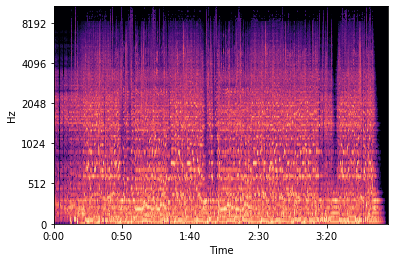

In [61]:
S = lb.feature.melspectrogram(samples_mono, sr=sr, hop_length = 512, n_mels = 250)
S_DB = lb.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis = 'mel')

In [58]:
print(S.shape)
print(4*len(samples_mono)/2048)

(250, 21128)
21127.5


#### Making log mel-spectrograms from MAT dataframes
The point of the music-aligned tab dataframes was that I could easily provide a drum piece label to a slice of music, in the hopes that the music/label pairing could potentially be used as a training, development, and/or test set. 

### NN Model Exploration

### TO DO LIST
+ Learn how to import other Jupyter Notebook code/functions into a different Jupyter Notebook
+ Learn how to change the numpy array of raw audio integers into something that librosa can use
+ Detail the contents of this notebook
+ Explore log mel-spectrogram and other components of librosa

#### List of Useful Shortcuts

* Ctrl + shift + P = List of Shortcuts
* Enter (command mode) = Enter Edit Mode (enter cell to edit it)
* Esc (edit mode) = Enter Command Mode (exit cell)
* A = Create Cell above
* B = Create Cell below
* D,D = Delete Cell
* Shift + Enter = Run Cell (code or markdown)
* M = Change Cell to Markdown
* Y = Change Cell to Code
* Ctrl + Shift + Minus = Split Cell at Cursor